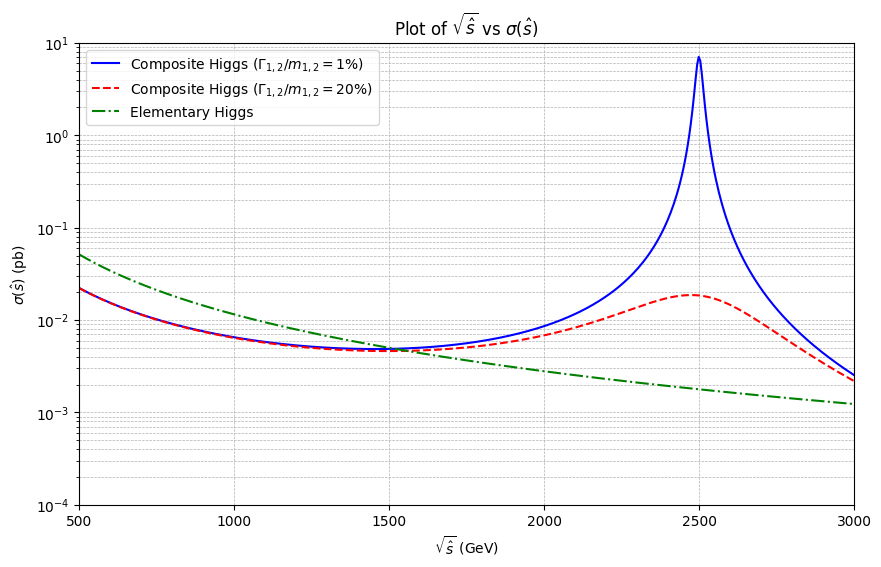

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M_Z = 91.2  # GeV
Gamma_Z = 2.5  # GeV
m_h = 125.0  # GeV
Gamma_1_over_m_1_values = [0.01, 0.2]  # Different values for Gamma_1/m_1

# Vector and axial vector couplings (examples, adjust as needed)
g_Z_SM = 0.577  # Example value
v_q = 0.5
a_q = 0.5
c2_Z = 0.25
xi = 0.6  # Example value

# Range of sqrt(s)
sqrt_s = np.linspace(500, 3000, 500)  # Adjusted range from 500 GeV to 3000 GeV

# Compute sigma_SM(s)
def sigma_SM(s):
    lambda_val = np.sqrt((1 - M_Z**2/s - m_h**2/s)**2 - 4 * M_Z**2 * m_h**2 / s**2)
    return ((g_Z_SM**2 * (v_q**2 + a_q**2) * lambda_val * s * (lambda_val**2 + 12 * M_Z**2 / s)) /
            (576 * np.pi * M_Z**2 * ((s - M_Z**2)**2 + M_Z**2 * Gamma_Z**2)))

# Compute sigma(s)
def sigma(s, m_1, Gamma_1):
    lambda_val = np.sqrt((1 - M_Z**2/s - m_h**2/s)**2 - 4 * M_Z**2 * m_h**2 / s**2)
    return (sigma_SM(s) * m_1**8 * (1 + Gamma_1**2 / m_1**2)**2) / \
           (((s - m_1**2)**2 + m_1**2 * Gamma_1**2) * ((M_Z**2 - m_1**2)**2 + m_1**2 * Gamma_1**2)) * \
           ((1 - xi) - (24 * np.sqrt(1 - xi) * c2_Z * M_Z**2 * np.sqrt(lambda_val**2 / 4 + M_Z**2 / s)) / \
            (m_1**2 * (lambda_val**2 + 12 * M_Z**2 / s)))

# Compute values
s = sqrt_s**2
m_1 = 2500  # Example value, you can adjust this

# Calculate sigma values for both Gamma_1/m_1 values
sigma_values_01 = sigma(s, m_1, Gamma_1_over_m_1_values[0] * m_1) * 1e12  # Convert to picobarns
sigma_values_02 = sigma(s, m_1, Gamma_1_over_m_1_values[1] * m_1) * 1e12  # Convert to picobarns

# Calculate sigma_SM values
sigma_SM_values = sigma_SM(s) * 1e12  # Convert to picobarns

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sqrt_s, sigma_values_01, label=r'Composite Higgs ($\Gamma_{1,2}/m_{1,2} = 1$%)', color='blue')
plt.plot(sqrt_s, sigma_values_02, label=r'Composite Higgs ($\Gamma_{1,2}/m_{1,2} = 20$%)', color='red', linestyle='--')
plt.plot(sqrt_s, sigma_SM_values, label=r'Elementary Higgs', color='green', linestyle='-.')
plt.xlabel(r'$\sqrt{\hat{s}}$ (GeV)')
plt.ylabel(r'$\sigma(\hat{s})$ (pb)')  # Label in picobarns
plt.title(r'Plot of $\sqrt{\hat{s}}$ vs $\sigma(\hat{s})$')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlim(500, 3000)  # Set x-axis range
plt.xticks(np.arange(500, 3001, 500))  # Set x-axis ticks
plt.ylim(1e-4, 1e1)  # Adjust y-axis limits
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
